# Prueba Antisacádica

In [322]:
%matplotlib inline

import bsp.core
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [14, 8]

## Cargar el estudio
Un **estudio** es un registro que se le hace a un paciente.

Estudio -> Pruebas -> Señales

In [323]:
from bsp.core import load_study
study = load_study("data/20240420-rbg-antisaccade.bsp")

print(f"El estudio tiene {len(study)} pruebas")
print()
for index, test in enumerate(study):
    print(index, test)

El estudio tiene 3 pruebas

0 HorizontalCalibration at 30°
1 HorizontalAntisaccadic at 30°
2 HorizontalCalibration at 30°


In [324]:
study.protocol ##Debería de ser antisacadic???

<Protocol.Saccadic: 'saccadic'>

# Obtener una prueba especifica del estudio:

## Pruebas: Horizontal y Vertical - Posición

In [325]:
antisacade = study[1]

In [326]:
antisacade.test_type

<TestType.HorizontalAntisaccadic: 'HorizontalAntisaccadic'>

In [327]:
antisacade.hor_stimuli

array([  0.   ,   0.   ,   0.   , ..., -24.576, -24.576, -24.576],
      dtype=float32)

In [328]:
antisacade.hor_channel

array([0.29317093, 0.29317093, 0.29317093, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [329]:
antisacade.hor_stimuli_raw

array([32768, 32768, 32768, ...,     0,     0,     0], dtype=int32)

In [330]:
antisacade.hor_channel_raw

array([534, 535, 538, ...,   0,   0,   0], dtype=uint16)

In [331]:
antisacade.hor_annotations

[]

In [332]:
antisacade.ver_annotations

[]

In [333]:
antisacade.hor_saccades

[]

In [334]:
antisacade.annotate

<bound method Test.annotate of <bsp.core.models.Test object at 0x13684b5e0>>

In [335]:
samples_to_remove = 100
samples = len(antisacade.hor_stimuli)
print("Esta prueba tiene " + str(samples)  + " muestras")

Esta prueba tiene 40000 muestras


Frecuencia de muestreo es de 1KHz, por lo que, cada muestra es un 1 ms. 

La variable del tiempo se va a cambiar de ms a s:

In [374]:
time = np.arange(samples) / 1000.0  # segundos
time = time[samples_to_remove:-samples_to_remove]


horizontal = antisacade.hor_channel.copy()[samples_to_remove:-samples_to_remove]
stimuli_horizontal = antisacade.hor_stimuli.copy()[samples_to_remove:-samples_to_remove]
   
vertical = antisacade.ver_channel.copy()[samples_to_remove:-samples_to_remove]
stimuli_vertical = antisacade.hor_stimuli.copy()[samples_to_remove:-samples_to_remove]

SAMPLES = 10000
time1 = time[:SAMPLES]
horizontal1 = horizontal[:SAMPLES]
stimuli_horizontal1 = stimuli_horizontal[:SAMPLES]
vertical1 = vertical[:SAMPLES]
stimuli_vertical1 = stimuli_vertical[:SAMPLES]

In [375]:
amplitude = horizontal.max() - horizontal.min()

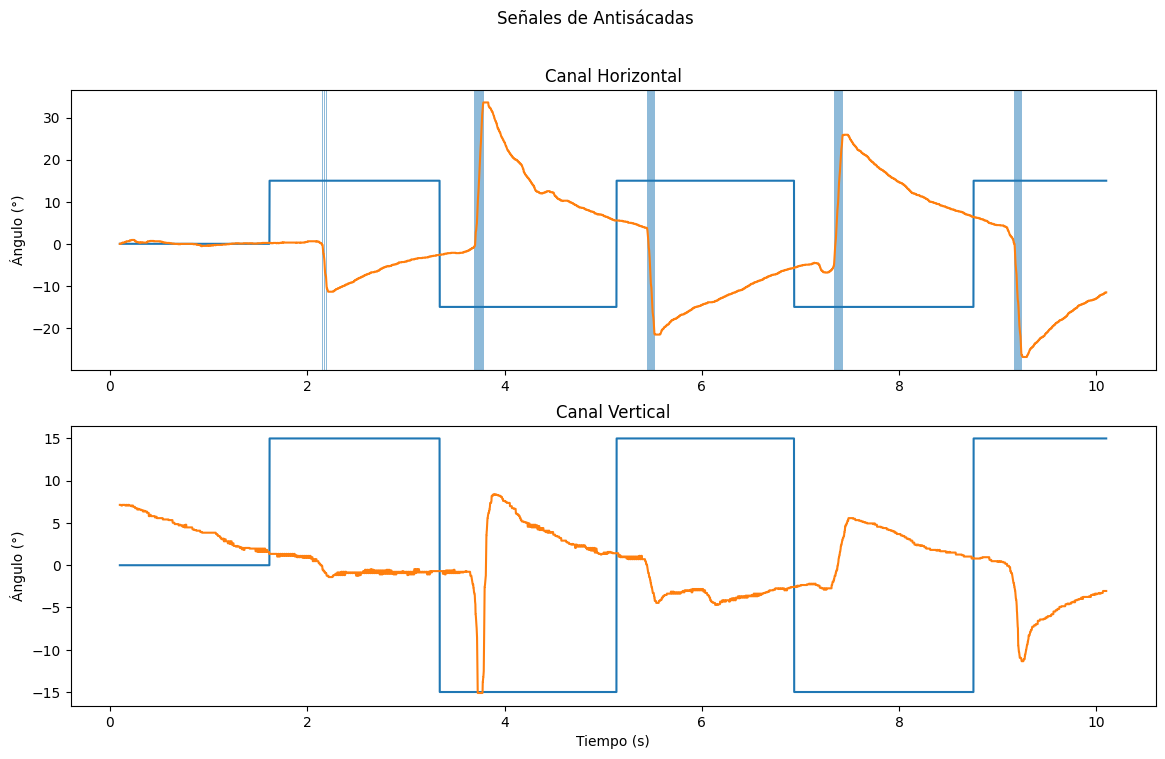

In [384]:
from bsp.core import impulses

plt.suptitle("Señales de Antisácadas")

plt.subplot(211)
plt.title("Canal Horizontal")
for start, end in impulses(horizontal1):
    plt.axvspan((start + samples_to_remove)/1000, (end + samples_to_remove)/1000, alpha=0.5)
plt.plot(time1, stimuli_horizontal1)
plt.plot(time1, horizontal1)
plt.ylabel("Ángulo (°)");
#plt.xlim(0, 5)  # Limitar el eje x de 0 a 5 segundos

plt.subplot(212)
plt.title("Canal Vertical")
plt.plot(time1, stimuli_vertical1)
plt.plot(time1, vertical1)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");


## Velocidad

In [339]:
from bsp.core import differentiate, denoise
from scipy.signal import medfilt

horizontal_filtered = medfilt(horizontal, 201)
velocities = differentiate(horizontal_filtered)
velocities_filtered = medfilt(velocities, 91)

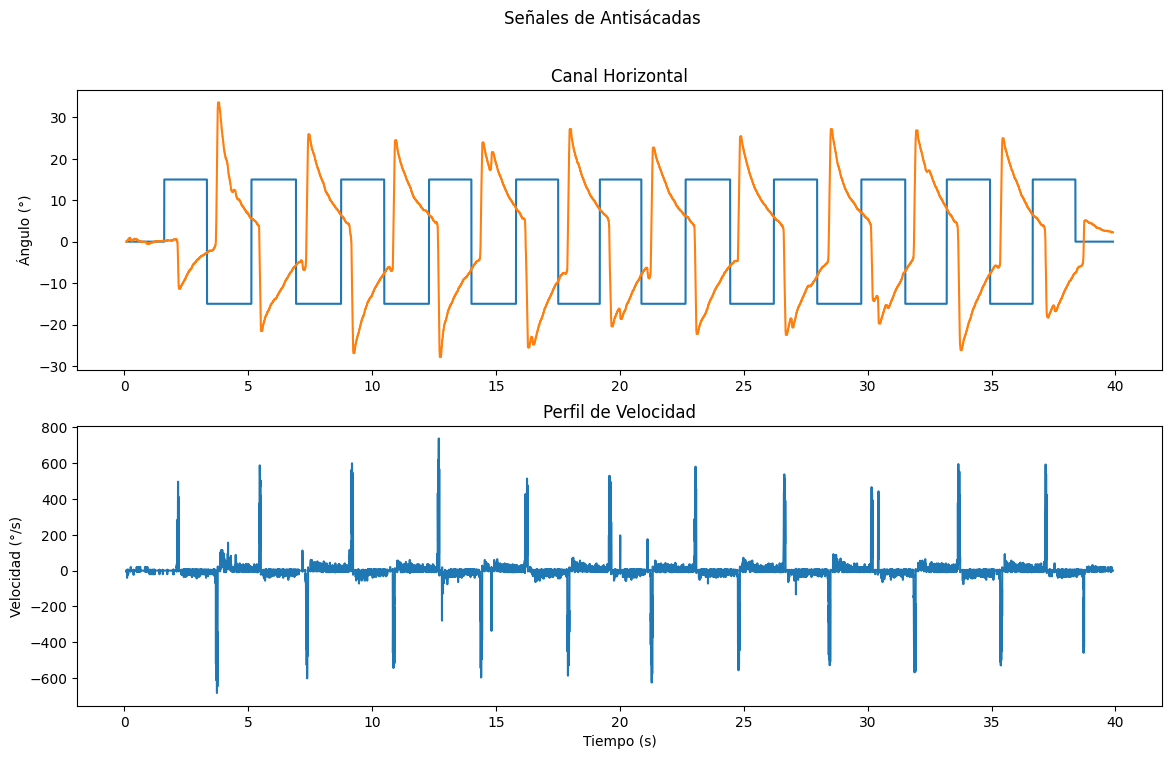

In [340]:
plt.suptitle("Señales de Antisácadas")

plt.subplot(211)
plt.title("Canal Horizontal")
plt.plot(time, stimuli_horizontal)
plt.plot(time, horizontal)
plt.ylabel("Ángulo (°)")

plt.subplot(212)
plt.title("Perfil de Velocidad")
#plt.plot(time, velocities_filtered)
plt.plot(time, velocities)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (°/s)");



## Impulses

In [361]:
from bsp.core import impulses

impulse_generator = impulses(horizontal)
for start, end in impulse_generator:
    print(horizontal[start:end])
    #if (start/1000 >= indice_inicio and end/1000 <= indice_fin/1000):
    print("Impulse:", start/1000, end/1000) #segundos


[-0.25543213 -0.25543213 -0.25543213 -0.56892014 -0.88240814 -1.1175232
 -1.352642   -1.5877571  -1.9012451  -2.1363602  -2.293106   -2.3714752
 -2.3714752  -2.3714752  -2.5282211  -2.6849632  -2.920082   -3.23357
 -3.3903122  -3.547058   -3.7821732  -4.174034   -4.644264   -5.114498
 -5.663101   -6.054962   -6.446823   -6.760311   -6.917053   -7.230541  ]
Impulse: 2.053 2.083
[ -7.622402  -7.622402  -7.779148  -8.249378  -8.641239  -8.954727
  -9.346586  -9.738447 -10.130308 -10.365423 -10.60054 ]
Impulse: 2.088 2.099
[-0.72566605 -0.6472931  -0.56892014 -0.56892014 -0.41217804 -0.41217804
 -0.41217804 -0.33380508 -0.25543213  0.05805588  0.44991684  0.92014694
  1.4687538   1.9389839   2.4092178   2.801075    2.879448    2.957821
  3.0361938   3.192936    3.506424    3.819912    4.1334      4.368519
  4.446888    4.603634    4.760376    5.152237    5.622471    6.171074
  6.79805     7.425026    8.052002    8.522236    9.149212    9.697815
 10.168049   10.559906   10.873394   11.18688

## Saccades

In [342]:
horizontal;

In [343]:
antisacade.hor_channel;

In [344]:
antisacade.angle;

In [345]:
antisacade.test_type

<TestType.HorizontalAntisaccadic: 'HorizontalAntisaccadic'>

In [346]:
from bsp.core import saccades

saccades_generator = saccades(antisacade.hor_channel, antisacade.angle)
for onset, offset in saccades_generator:
    print("Saccade onset:", onset, "Saccade offset:", offset)

TypeError: 'module' object is not callable

In [347]:
antisacade.hor_saccades

[]

**Valor de la velocidad** -> depende del filtro

In [348]:
tiempo_inicio = 2  # segundos
tiempo_fin = 4  # segundos

# Encontrar los índices correspondientes al intervalo de tiempo
indice_inicio = np.argmax(time >= tiempo_inicio)
indice_fin = np.argmax(time >= tiempo_fin)

velocities_filtered_intervalo_tiempo = velocities_filtered[indice_inicio:indice_fin]

# Encontrar máxima velocidad dentro del intervalo de tiempo
max_vel_intervalo_tiempo = np.max(velocities_filtered_intervalo_tiempo)

print("El valor máximo de velocidad dentro del intervalo de tiempo de {} a {} segundos es: {}".format(tiempo_inicio, tiempo_fin, max_vel_intervalo_tiempo))


El valor máximo de velocidad dentro del intervalo de tiempo de 2 a 4 segundos es: 62.85897427598172


# Cálculo biomarcadores agregados

## Contador antisácadas
¿Cómo identificar el inicio de una antisácada? Con el vector velocidad o posición
  - Cuando inicio una antisácada?
    - En la tesis: umbral de 30 grados/seg
    - En código: se hace cuando la velocidad sobrepasa un umbral -> desviacion estandar de todas las velocidades del array.

Se producen 22 antisácadas y según el filtro capta más o menos, si ventana es 101 -> en esta prueba da 22 antisácadas


In [349]:
from bsp.core import differentiate, denoise
from scipy.signal import medfilt

velocities = medfilt(differentiate(horizontal), 91)
velocities_abs = abs(velocities)
is_in_antisaccade = False
num_antisaccades_30 = 0
num_antisaccades_desv = 0

# Umbral 30 grados/seg
threshold1 = 30
for v in velocities_abs:
    if v > threshold1 and not is_in_antisaccade:
        num_antisaccades_30 += 1
        is_in_antisaccade = True
    elif v <= threshold1 and is_in_antisaccade:
        is_in_antisaccade = False
print("El número de antisácadas es con umbral de 30°/s : ", num_antisaccades_30)

# Umbral desviación estandar de las velocidades
threshold2 = velocities.std()
for v in velocities_abs:
    if v > threshold2 and not is_in_antisaccade:
        num_antisaccades_desv += 1
        is_in_antisaccade = True
    elif v <= threshold2 and is_in_antisaccade:
        is_in_antisaccade = False
print("El número de antisácadas es con umbral de desviación típica : ", num_antisaccades_desv)

El número de antisácadas es con umbral de 30°/s :  35
El número de antisácadas es con umbral de desviación típica :  22


In [350]:
import numpy as np

instantes_cambio = []

for i in range(1, len(stimuli_horizontal)):
    if stimuli_horizontal[i] != stimuli_horizontal[i - 1]:
        instante = time[i]  # El instante de tiempo se corresponde con el índice en este caso
        instantes_cambio.append(instante)
num_antisacadas = len(instantes_cambio)
# Muestra los instantes de tiempo en los que ocurren los cambios
print("Instantes de tiempo en los que ocurren los cambios:", instantes_cambio)
print("Número de antisádas que se deben de producir", num_antisacadas)


Instantes de tiempo en los que ocurren los cambios: [1.617, 3.342, 5.135, 6.935, 8.754, 10.494, 12.3, 14.012, 15.812, 17.514, 19.193, 20.87, 22.654, 24.452, 26.216, 27.963, 29.744, 31.518, 33.192, 34.94, 36.66, 38.383]
Número de antisádas que se deben de producir 22


## Inhibición de la respuesta
$$\text{Inhibición de la respuesta} = \frac{\text{Total sácadas inapropiadas}}{\text{Total antisácadas}}$$

¿Cuándo hay una **sácada inapropiada**?
    Cuando el valor del nuevo ángulo es menor a los anteriores, ya que en una antisácada se espera un valor mayor al los anteriores en la variable del ángulo (en terminos absolutos).

    Si las antisácadas comienzan cuando la velocidad es superior a 30°/s, ver valor de velocidad en las sácadas inapropiadas

In [351]:
# Total antisácadas que se producen -> antisácada se da cuando v >= 30
threshold3 = 30
for v in velocities_abs:
    if v > threshold2 and not is_in_antisaccade:
        num_antisaccades_desv += 1
        is_in_antisaccade = True
    elif v <= threshold2 and is_in_antisaccade:
        is_in_antisaccade = False
print("El número de antisácadas es con umbral de desviación típica : ", num_antisaccades_desv)

# Total sácadas inapropiadas

El número de antisácadas es con umbral de desviación típica :  44


# Cálculo biomarcadores por movimiento

## Analizo 1 antisácada

indice_inicio: 5900
indice_fin: 7901
longitud de estimulo 39800
longitud de time 39800


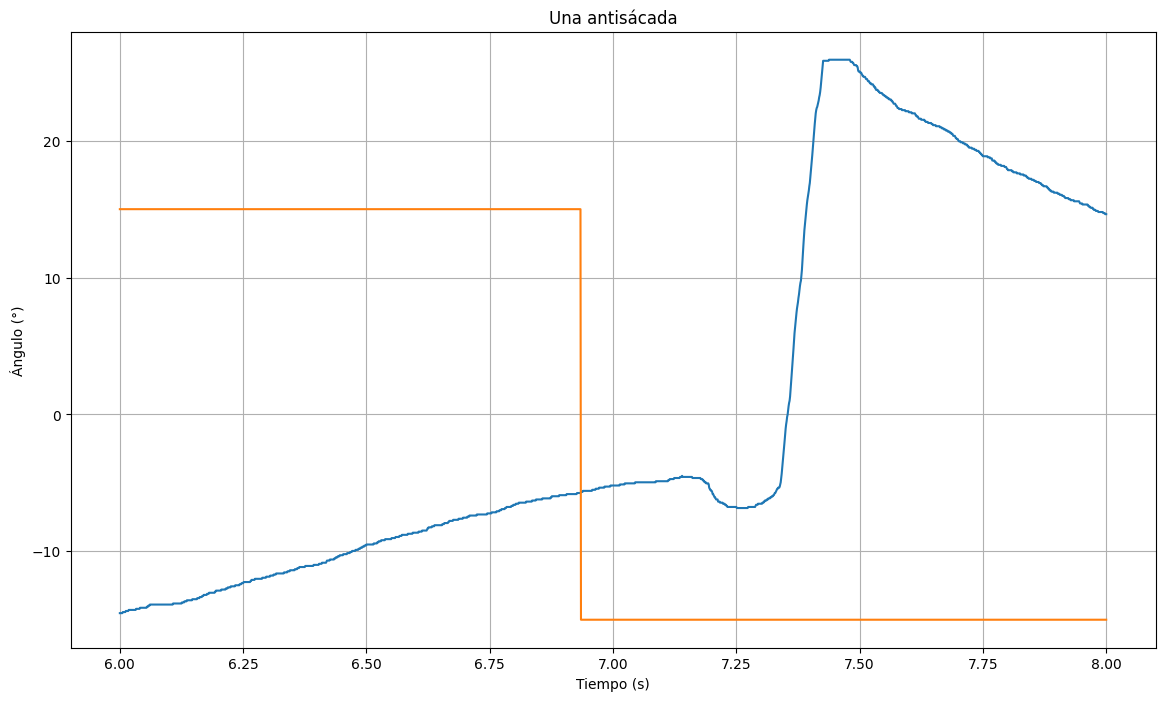

In [352]:
indice_inicio = np.argmax(time >= 6)
indice_fin = np.argmax(time > 8)

print("indice_inicio:", indice_inicio)
print("indice_fin:", indice_fin)

horizontal_intervalo = horizontal[indice_inicio:indice_fin]
time_intervalo = time[indice_inicio:indice_fin]
stimuli_intervalo = stimuli_horizontal[indice_inicio:indice_fin]


plt.title("Una antisácada")
plt.plot(time_intervalo, horizontal_intervalo)
plt.plot(time_intervalo, stimuli_intervalo)
#plt.plot(time, stimuli_horizontal)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");
plt.grid(True)

print("longitud de estimulo", len(stimuli_horizontal))
print("longitud de time", len(time))

## Estímulo
¿Cuándo se produce el estímulo?

In [353]:
cambio_estimulo = np.where(np.diff(stimuli_intervalo) != 0)[0]
instante_cambio = time_intervalo[cambio_estimulo]

# Muestra los instantes de tiempo en los que cambia el estímulo
print("Indice_cambio_estimulo:", cambio_estimulo/1000)
print("Instantes de tiempo en los que cambia el estímulo:", instante_cambio)

Indice_cambio_estimulo: [0.934]
Instantes de tiempo en los que cambia el estímulo: [6.934]


## Latencia Antisacádica
$$\text{Latencia antisacádica} = (X_{\text{inicio antisácada}} - X_{\text{inicio estímulo}}) \times \text{Intervalo de muestras}$$

In [354]:
fs = 1000;
intervalo_muestras = 1/fs

inicio_estimulo = instante_cambio

velocities_intervalo = velocities[indice_inicio:indice_fin]
velocities_intervalo_abs = abs(velocities_intervalo)

# Inicio antisácada
antisacada_iniciada = False
antisacada_finalizada = False
for i in range(1, len(velocities_intervalo_abs)):
    if (velocities_intervalo_abs[i] >= 30 and antisacada_iniciada == False):
        onset_ms = i
        velocidad_inicio = velocities_intervalo_abs[i]
        antisacada_iniciada = True
    elif (velocities_intervalo_abs[i] <=30 and antisacada_iniciada == True and antisacada_finalizada == False):
        offset_ms = i
        velocidad_fin = velocities_intervalo_abs[i]
        antisacada_finalizada = True

onset_s = onset_ms/fs
offset_s = offset_ms/fs

print("onset_s: ", onset_s)
print("offset_s: ", offset_s)
print("longitud horizontal_intervalo: ", len(horizontal_intervalo))

onset_s:  1.319
offset_s:  1.428
longitud horizontal_intervalo:  2001


Ángulo inicio de la antisácada:  -6.054962
Ángulo fin de la antisácada:  25.842453
Inicio de la antisácada en el segundo:  7.319
Fin antisácada en el segundo:  7.428


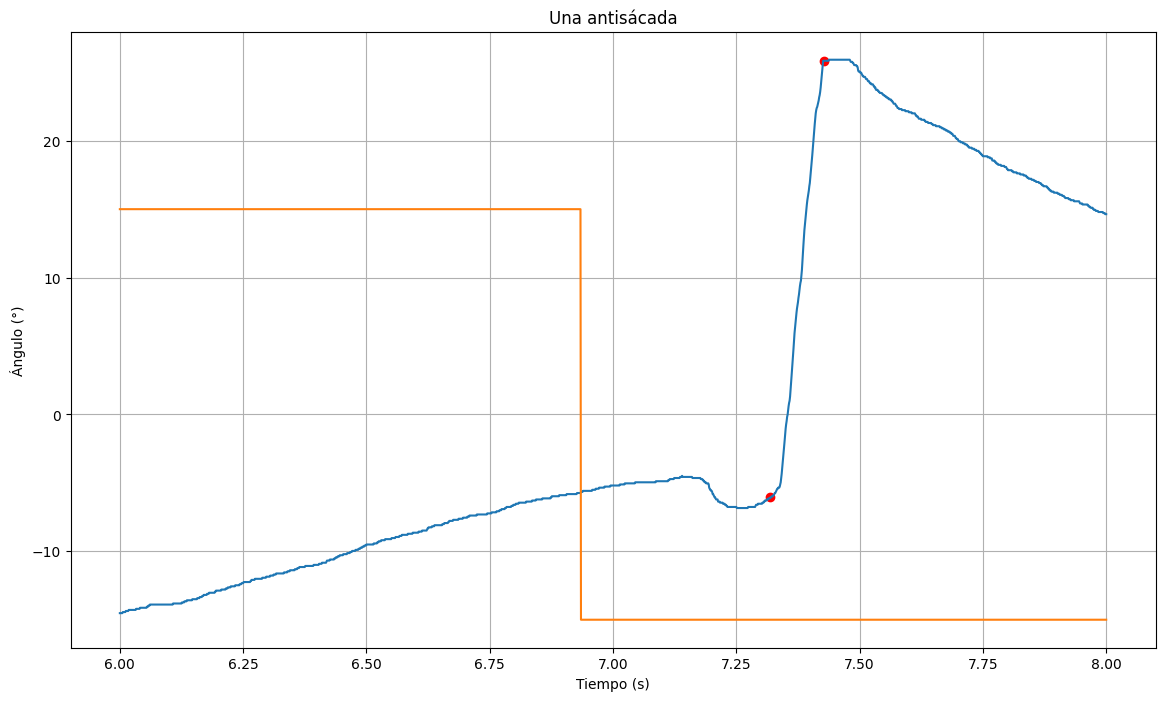

In [355]:
plt.title("Una antisácada")
plt.plot(time_intervalo, horizontal_intervalo)
plt.plot(time_intervalo, stimuli_intervalo)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");
plt.grid(True)

inicio_antisacada = onset_s + time_intervalo[0]
fin_antisacada = offset_s + time_intervalo[0]

plt.scatter(inicio_antisacada, horizontal_intervalo[onset_ms], color='red', label='Punto')
plt.scatter(fin_antisacada, horizontal_intervalo[offset_ms], color='red', label='Punto')

print("Ángulo inicio de la antisácada: ", horizontal_intervalo[onset_ms])
print("Ángulo fin de la antisácada: ", horizontal_intervalo[offset_ms])

print("Inicio de la antisácada en el segundo: ", inicio_antisacada)
print("Fin antisácada en el segundo: ", fin_antisacada)

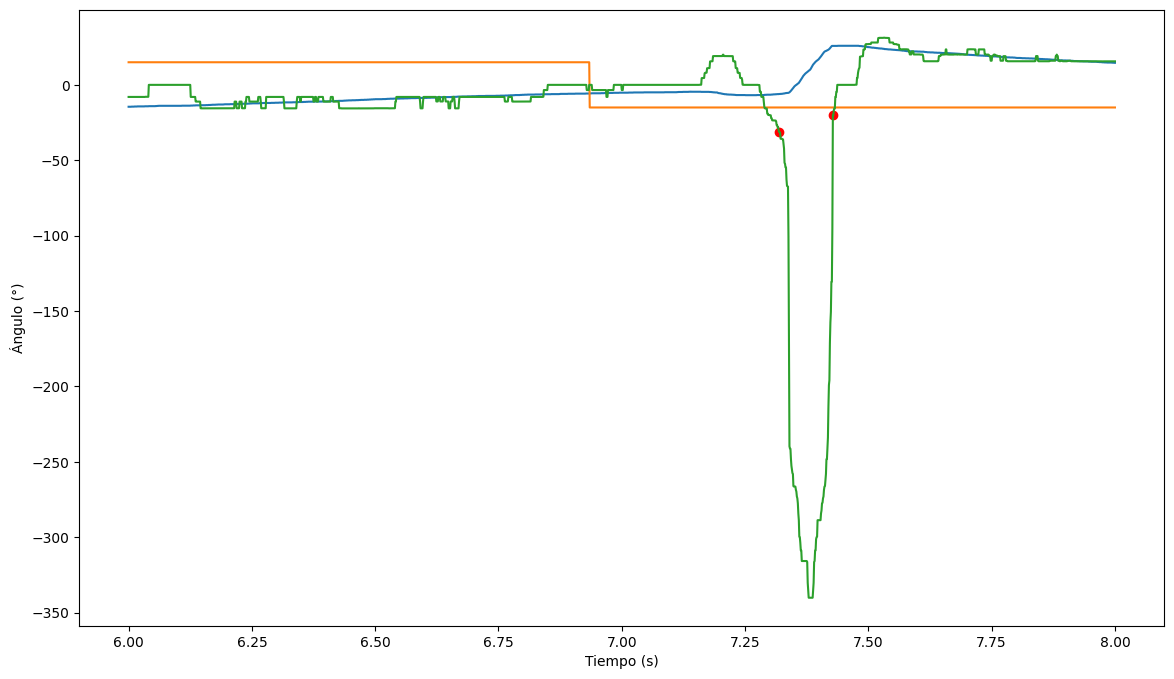

In [356]:
plt.plot(time_intervalo, horizontal_intervalo_time)
plt.plot(time[indice_inicio:indice_fin], stimuli_intervalo)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)");

plt.plot(time_intervalo, velocities_intervalo)
plt.scatter(onset_s + time_intervalo[0], -velocidad_inicio, color='red', label='Punto')
plt.scatter(offset_s + time_intervalo[0], -velocidad_fin, color='red', label='Punto')

In [357]:
latencia = abs(inicio_estimulo - inicio_antisacada) # No se multiplica por intervalo de muestras porque se ha hecho antes
print("Latencia Antisacádica (segundos): ", latencia)

Latencia Antisacádica (segundos):  [0.385]


## Velocidad máxima


Velocidad máxima es:  340.1904658189372
indice_velocidad_max es:  1379
indice_velocidad_max_seg es:  1.379


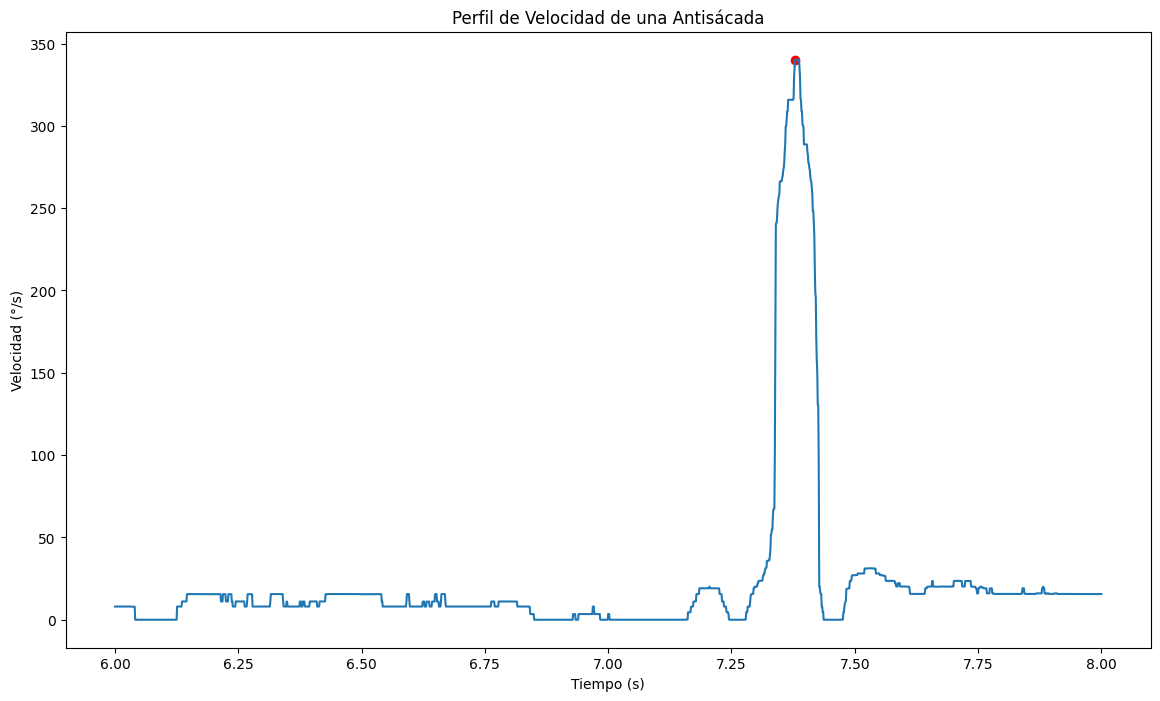

In [358]:
velocidad_max = max(abs(velocities_intervalo))
print("Velocidad máxima es: ", velocidad_max)

indice_velocidad_max = np.argmax(abs(velocities_intervalo))
print("indice_velocidad_max es: ", indice_velocidad_max)
indice_velocidad_max_seg = indice_velocidad_max/fs # Son importantes los decimales en segundos
print("indice_velocidad_max_seg es: ", indice_velocidad_max_seg)

plt.title("Perfil de Velocidad de una Antisácada")
plt.plot(time_intervalo, abs(velocities_intervalo))
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (°/s)");
plt.scatter(indice_velocidad_max_seg + time_intervalo[0], velocidad_max, color='red', label='Punto')


## Precisión de la localización del estímulo en la memoria
$$\text{Precisión de la localización del estímulo en memoria} = \frac{\text{Ángulo del estímulo}-\text{Amplitud de la antisácada}}{\text{Ángulo del estímulo}}$$

$$\text{Amplitud de la antisácada} = \left| Y_{\text{fin antisácada}} - Y_{\text{inicio antisácada}} \right|$$

In [359]:
# Amplitud
angulo_inicio_antisacada = horizontal_intervalo[onset_ms]
angulo_fin_antisacada = horizontal_intervalo[offset_ms]
amplitud = abs(horizontal_intervalo[offset_ms]-horizontal_intervalo[onset_ms])
print("Ángulo de inicio: {}. Ángulo de fin: {}. Amplitud: {}".format(angulo_inicio_antisacada, angulo_fin_antisacada, amplitud))

Ángulo de inicio: -6.054962158203125. Ángulo de fin: 25.842453002929688. Amplitud: 31.897415161132812


## Duración
$$\text{Duración} = (X_{\text{fin antisácada}} - X_{\text{inicio antisácada}}) \times \text{Intervalo de muestras}$$

In [360]:
duracion = fin_antisacada - inicio_antisacada # No se multiplica por el intervalo de muestras porque ya está en segundos
print("Duración: ", duracion)
print("Fin antisacada: {}. Inicio antisacada: {}. Duración: {}".format(fin_antisacada, inicio_antisacada, duracion))

Duración:  0.10899999999999999
Fin antisacada: 7.428. Inicio antisacada: 7.319. Duración: 0.10899999999999999
